In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,log_loss,classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor




In [3]:
ins_df = pd.read_csv("insurance.csv")

In [5]:
ins_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
X = ins_df.drop('charges',axis= 1)
y = ins_df[['charges']]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [15]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
ct_ohe = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),
                                  (ohe,make_column_selector(dtype_include = object) ),
                                  verbose_feature_names_out = False).set_output(transform = 'pandas')



In [31]:
dtr = DecisionTreeRegressor(random_state = 24)
pipe = Pipeline([('CT',ct_ohe),('DTC',dtr)])
params = {'DTC__min_samples_split':[2,3,4,5,6,10,25,50],
          'DTC__min_samples_leaf':[1,2,5,6,7,10,25,50],
          'DTC__max_depth':[None,4,6]
         }
kfold = KFold(n_splits = 5, shuffle = True, random_state = 24)
gcv = GridSearchCV(pipe,param_grid = params,scoring = 'r2',
                   cv = kfold, verbose = 3)

In [33]:
gcv.fit(X,y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.782 total time=   0.0s
[CV 2/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.698 total time=   0.0s
[CV 3/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.750 total time=   0.0s
[CV 4/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.725 total time=   0.0s
[CV 5/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=0.707 total time=   0.0s
[CV 1/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=3;, score=0.752 total time=   0.0s
[CV 2/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=3;, score=0.748 total time=   0.0s
[CV 3/5] END DTC__max_depth=None, DTC__min_samples_leaf=1, DTC__min_samples_split=3;, score=0.755 total time=   0.0s
[

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000164924EB830>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001648FE03D70>)],
                                                          verbose_feature_names_out=False)),
                                       ('DTC',
                                        DecisionTreeRegressor(random_state=24))]),
             param_grid={'DTC__max_depth': [None, 4, 6],
                         'DTC__min_samples_leaf': [1, 2, 5, 6, 7, 10, 25, 50],
                         'DTC__min_samples_split': [2, 3, 4, 5, 6, 10, 25, 50]},
             scoring='r2', verbose=3)

In [35]:
print(gcv.best_params_)
print(gcv.best_score_)

{'DTC__max_depth': 6, 'DTC__min_samples_leaf': 50, 'DTC__min_samples_split': 2}
0.8519043198478518


In [37]:
best_tree = gcv.best_estimator_

In [39]:
best_tree.named_steps['DTC']

DecisionTreeRegressor(max_depth=6, min_samples_leaf=50, random_state=24)

In [41]:
best_tree.named_steps['DTC'].feature_importances_

array([0.10879376, 0.16672587, 0.00757747, 0.        , 0.        ,
       0.71524286, 0.        , 0.00166003, 0.        , 0.        ,
       0.        ])

In [43]:
best_tree.named_steps['CT'].get_feature_names_out()

array(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'], dtype=object)

In [45]:
best_tree_model = gcv.best_estimator_.named_steps['DTC']


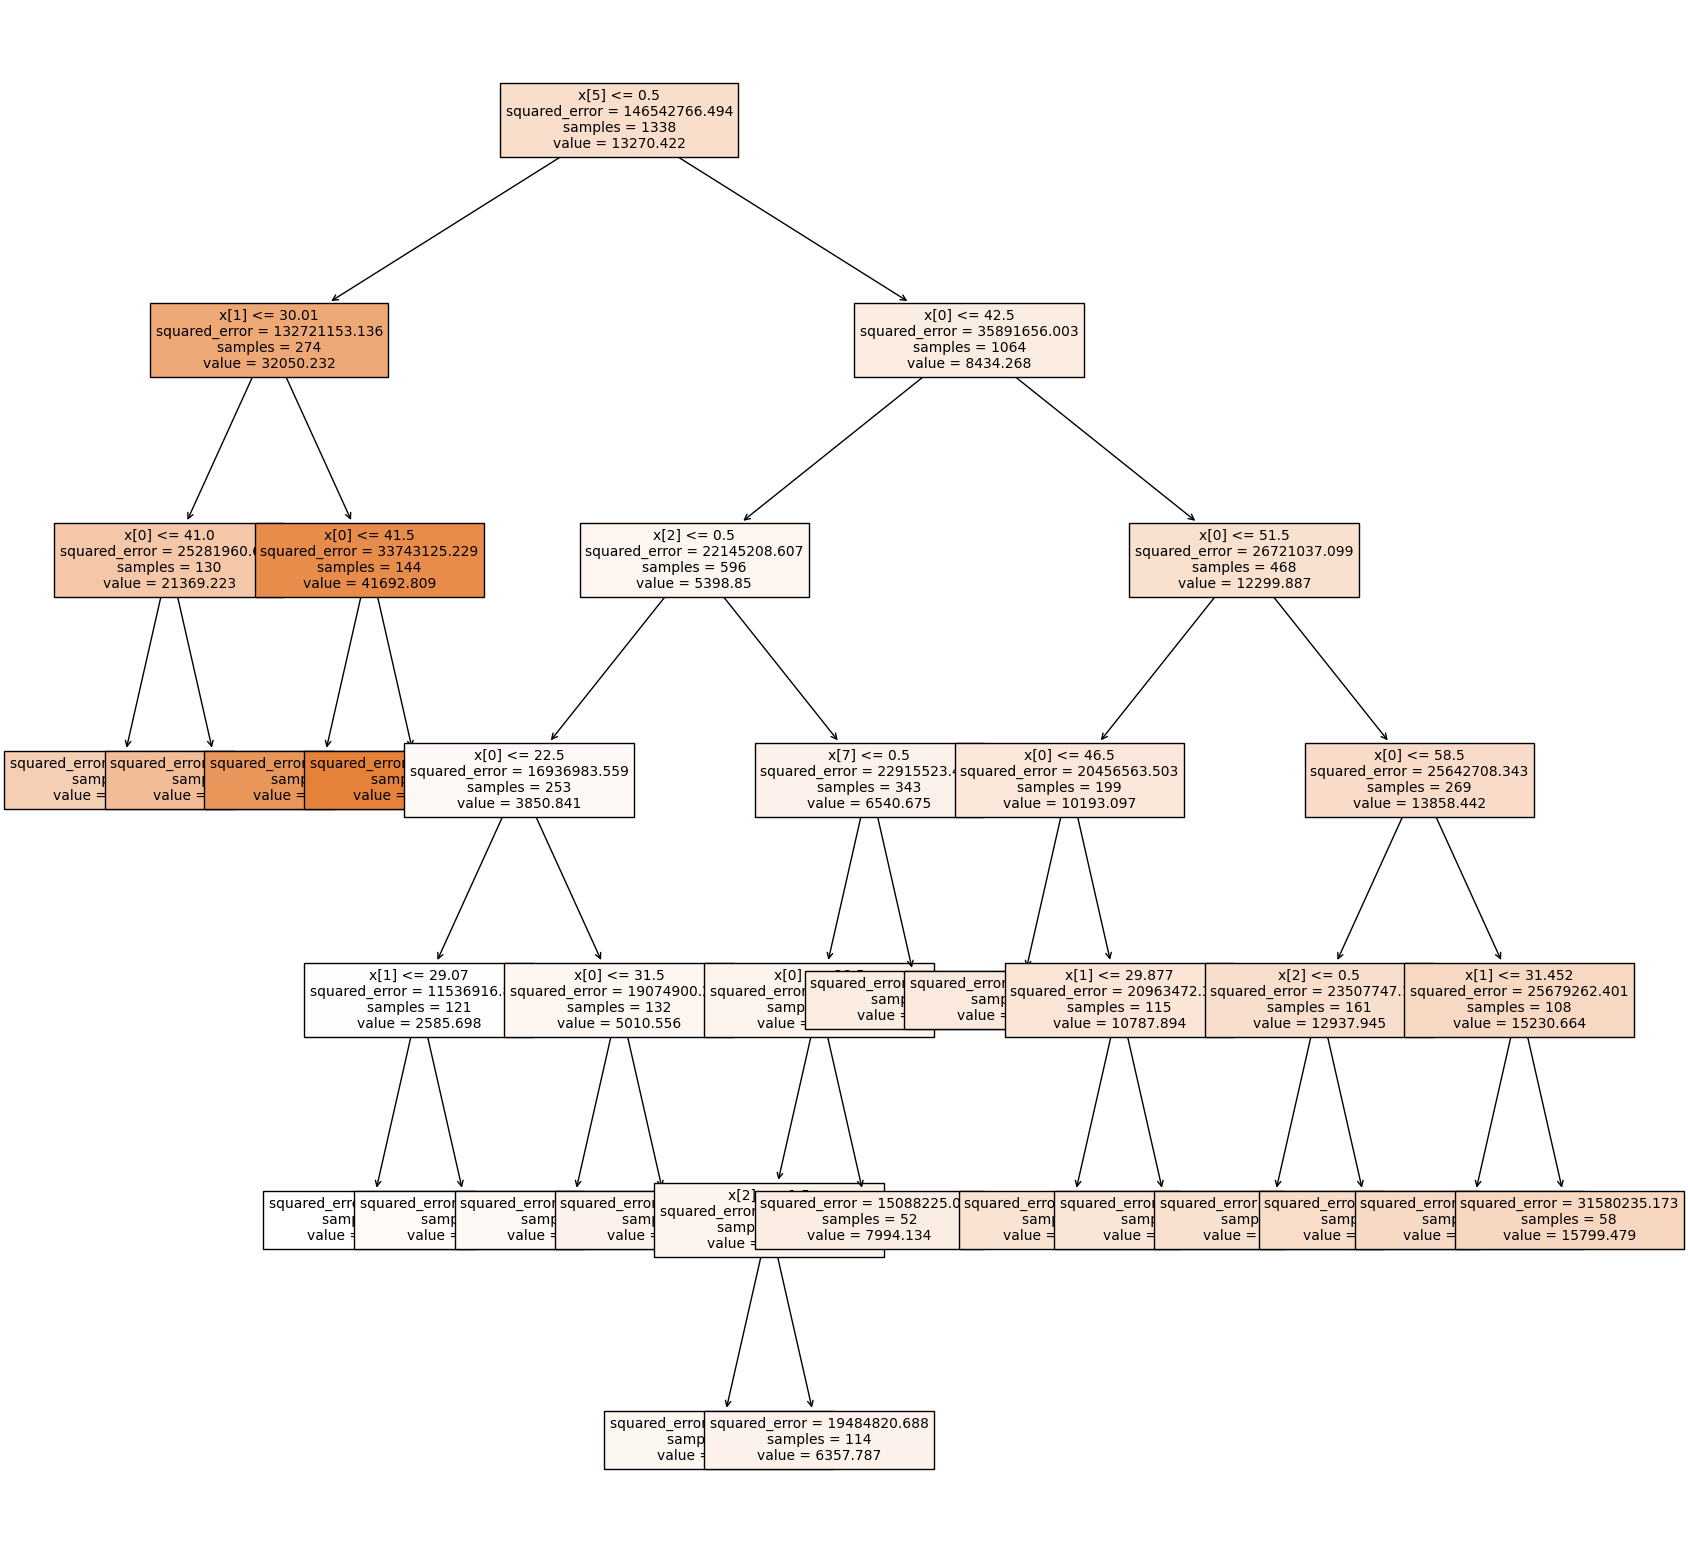

In [47]:
plt.figure(figsize=(20, 20))  # Adjust the size as needed
plot_tree(best_tree_model,  # Adjust based on your target classes
          filled=True,              # Color the tree nodes based on class
          fontsize=10)              # Adjust font size to fit the tree
plt.show()

In [51]:
df_imp = pd.DataFrame({'feature':list(gcv.best_estimator_.named_steps['CT'].get_feature_names_out()),
                      'importance': best_tree_model.feature_importances_ })
df_imp.sort_values('importance',inplace = True)

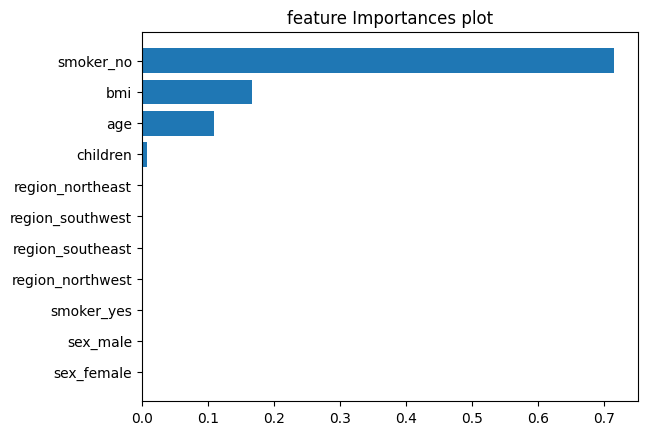

In [53]:
df_imp.sort_values('importance', inplace = True)
plt.barh(df_imp['feature'],df_imp['importance'])
plt.title("feature Importances plot")
plt.show()

In [59]:
df_imp

,feature,importance
3,sex_female,0.000000
4,sex_male,0.000000
6,smoker_yes,0.000000
8,region_northwest,0.000000
9,region_southeast,0.000000
10,region_southwest,0.000000
7,region_northeast,0.001660
2,children,0.007577
0,age,0.108794
1,bmi,0.166726


In [77]:
best_tree.fit(X_train,y_train)

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016493F620C0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016492C1E750>)],
                                   verbose_feature_names_out=False)),
                ('DTC',
                 DecisionTreeRegressor(max_depth=6, min_samples_leaf=50,
                                       random_state=24))])

In [81]:
y_pred = best_tree.predict(X_test)

In [83]:
score = r2_score(y_test,y_pred)

In [85]:
score

0.848068886009226